### #1753 최단경로
* https://www.acmicpc.net/problem/1753

In [35]:
#시간초과
import sys
input = sys.stdin.readline

V,E = map(int,input().split())
K = int(input().rstrip())
inf = sys.maxsize #거리 초기화를 위한 변수 설정
graph = [[] for _ in range(V+1)]
for _ in range(E) :
    u,v,w = map(int,input().split())
    graph[u].append((v,w)) #인접 리스트로 그래프 구성

visited = [False] * (V+1) #방문 여부

D = [inf] * (V+1) #최단거리 리스트
D[K] = 0 #시작노드로의 최단 거리는 0으로 설정

def dijkstra(graph, D, visited, V) :
    for i in range(1,V+1) : #시작 노드에서 가장 잛은 거리를 가지는 노드를 찾기 위해 모든 노드를 순회
        m = -1
        minimum = sys.maxsize
        for j in range(1,V+1) :
            if not visited[j] and D[j] < minimum :
                minimum = D[j]
                m = j
        visited[m] = True

        for destination, cost in graph[m] :
            if not visited[destination] :
                if D[m] + cost < D[destination] : #m을 거쳐서 지나가는 경로가 더 짧다면 갱신
                    D[destination] = D[m] + cost

dijkstra(graph, D, visited, V)
for i in range(1,V+1) :
    if D[i] == inf :
        print('INF')
    else :
        print(D[i])

1
0
[False, True, False, False, False]
[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[9223372036854775807, 0, 9223372036854775807, 2, 9223372036854775807]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
3
2
[False, True, False, True, False]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
[9223372036854775807, 0, 6, 2, 2]
4
2
[False, True, False, True, True]
[9223372036854775807, 0, 6, 2, 2]
[9223372036854775807, 0, 3, 2, 2]
2
3
[False, True, True, True, True]
[9223372036854775807, 0, 3, 2, 2]
0
3
2
2


In [11]:
#heapq 사용
import sys
from heapq import * #우선순위큐로 heap을 사용
input = sys.stdin.readline

V,E = map(int,input().split())
K = int(input().rstrip())
inf = sys.maxsize #거리 초기화를 위한 inf값 설정
graph = [[] for _ in range(V+1)]
for _ in range(E) :
    u,v,w = map(int,input().split())
    graph[u].append((w,v)) #인접 리스트로 그래프 구성 
    #거리 순으로 정렬을 해야하므로, 가중치(거리)를 튜플의 첫번째 원소로 변경 
    #(v,w) -> (w,v)

visited = [False] * (V+1) #방문 여부

D = [inf] * (V+1) #최단거리 리스트
D[K] = 0 #시작노드로의 최단 거리는 0으로 설정

def dijkstra(graph, D, visited) :
    min_heap = []
    '''
    #가장 잛은 거리를 가지는 노드를 찾기 위해 모든 노드를 순회
    for i in range(1,V+1) :
        m = -1
        minimum = sys.maxsize
        for j in range(1,V+1) :
            if not visited[j] and D[j] < minimum :
                minimum = D[j]
                m = j
    '''
    heappush(min_heap,(0,K))
    while min_heap : 
        dist, current = heappop(min_heap)
        if visited[current] :
            continue #이미 방문했다면 처음으로 돌아가 최솟값을 다시 pop
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] : #m을 거쳐서 지나가는 경로가 더 짧다면 갱신
                    D[destination] = D[current] + cost
                    heappush(min_heap, (D[destination], destination)) #최소 힙에 (거리, 목적지) 추가

dijkstra(graph, D, visited, V)
for i in range(1,V+1) :
    if D[i] == inf :
        print('INF')
    else :
        print(D[i])

0
2
3
7
INF


### #1504 특정한 최단 경로
* https://www.acmicpc.net/problem/1504
1 -> v1 -> v2 -> N 까지의 경로 길이를 나누어 구한 뒤에 합한다.

처음 짠 코드
```python
import sys
from heapq import *
input = sys.stdin.readline

N, E = map(int,input().split())
graph = [[] for _ in range(N+1)] #인덱스를 맞춰주기 위해 +1
for _ in range(E) :
    a,b,c = map(int,input().split())
    graph[b].append((c,a)) #heapq 사용을 위해 (가중치, 목적지) 순으로 
    graph[a].append((c,b)) #양방향이므로

v1, v2 = map(int,input().split()) #반드시 지나야 하는 두 개의 정점

inf = sys.maxsize

def Dijkstra(graph, D, start, visited) :
    pq = []
    heappush(pq, (0,start))
    
    while pq :
        dist, current = heappop(pq)
        if visited[current] :
            continue
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] :
                    D[destination] = D[current] + cost
                    heappush(pq, (D[destination], destination))

cnt = 0
for start,end in zip([1,v1,v2],[v1,v2,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt += D[end]

if cnt >= inf :
    print(-1)
else :
    print(cnt)
```
하지만 이 코드는 예제는 풀지만

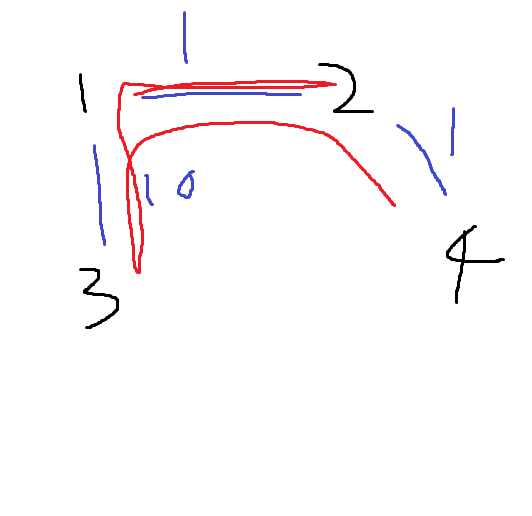
**반례**

위의 그래프에서 2,3번 노드를 v1,v2로 설정하면 짜여진 코드에서는 24를 반환하는데, 실제 답은 22이다.

v2를 먼저 들릴 수도 있다는 사실을 생각하지 못해서 문제가 발생했고 이후에 코드를 수정했다.

In [17]:
import sys
from heapq import *
input = sys.stdin.readline

N, E = map(int,input().split())
graph = [[] for _ in range(N+1)] #인덱스를 맞춰주기 위해 +1
for _ in range(E) :
    a,b,c = map(int,input().split())
    graph[b].append((c,a)) #heapq 사용을 위해 (가중치, 목적지) 순으로 
    graph[a].append((c,b)) #양방향이므로

v1, v2 = map(int,input().split()) #반드시 지나야 하는 두 개의 정점

inf = sys.maxsize

def Dijkstra(graph, D, start, visited) :
    pq = []
    heappush(pq, (0,start))
    
    while pq :
        dist, current = heappop(pq)
        if visited[current] :
            continue
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] :
                    D[destination] = D[current] + cost
                    heappush(pq, (D[destination], destination))

cnt1 = 0
for start,end in zip([1,v1,v2],[v1,v2,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt1 += D[end]

cnt2 = 0
for start,end in zip([1,v2,v1],[v2,v1,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt2 += D[end]

cnt = min(cnt1,cnt2)
if cnt >= inf :
    print(-1)
else :
    print(cnt)

1
11
12
10
11
1
22
